# РК1  
**ИУ5-61Б Искорнев Иван**  

**Вариант 7**

---

## Задача №1

Для заданного набора данных проведите корреляционный анализ.  
В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.  
Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Для пары произвольных колонок данных построить график "Диаграмма рассеяния"


[Ссылка на датасет](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

# 1.1 Изучение датасета
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

Первые 5 строк данных:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2  

Количество пропусков по колонкам:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Форма набора после удаления пропусков: (500, 9)


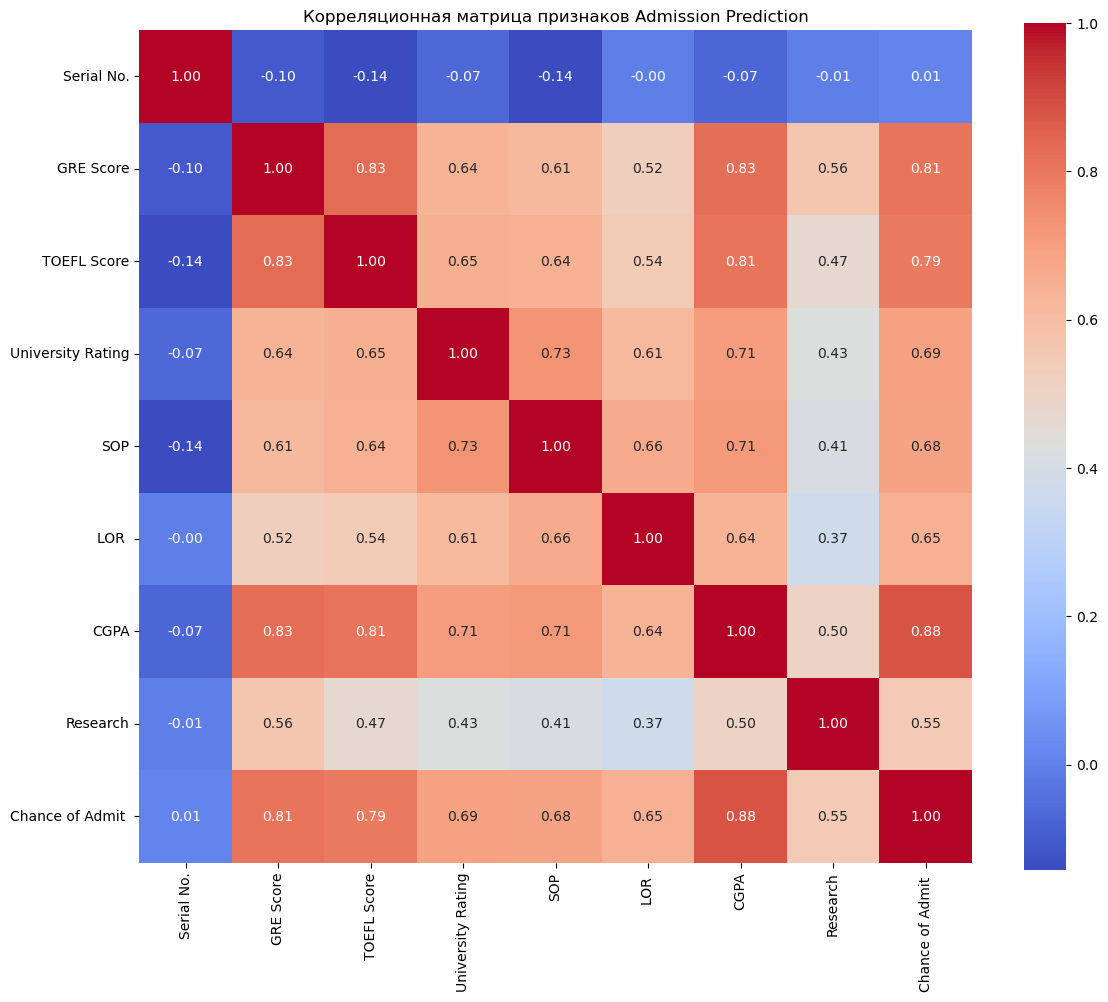

In [6]:
# 2. Проверка пропусков
print("Количество пропусков по колонкам:")
print(df.isnull().sum())

# 3. Удаление строк с пропущенными значениями
df_clean = df.dropna()
print("\nФорма набора после удаления пропусков:", df_clean.shape)

# 4. Корреляционный анализ
corr_matrix = df_clean.corr(numeric_only=True)

# 5. Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Корреляционная матрица признаков Admission Prediction")
plt.tight_layout()
plt.show()

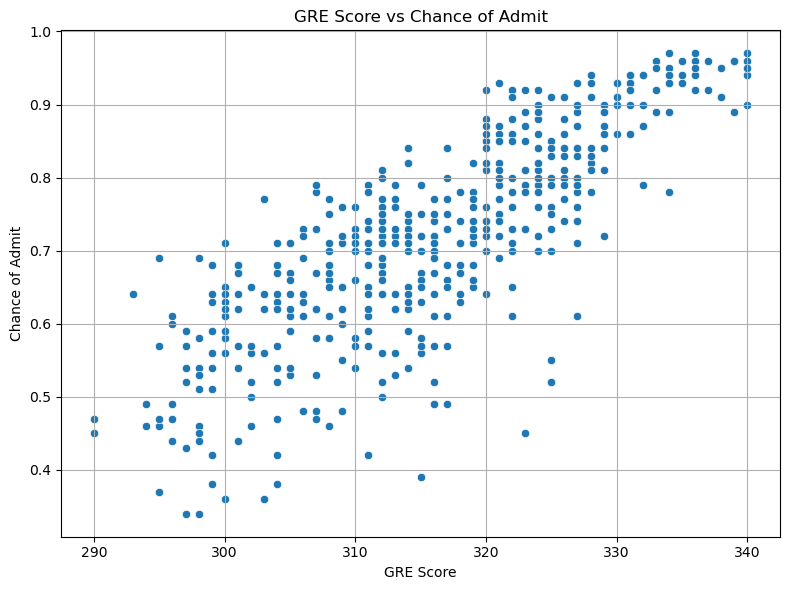

In [7]:
# 6. Диаграмма рассеяния: GRE Score vs Chance of Admit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='GRE Score', y='Chance of Admit ')
plt.title("GRE Score vs Chance of Admit")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.grid(True)
plt.tight_layout()
plt.show()


###  **1. Возможность построения моделей машинного обучения**

- Признаки в наборе данных демонстрируют **существенную корреляцию** с целевой переменной **Chance of Admit**, что делает возможным применение регрессионных моделей или моделей на основе деревьев решений.
- Корреляционный анализ позволяет оценить, какие признаки **наиболее информативны** — чем выше модуль корреляции с **Chance of Admit**, тем выше их значимость при прогнозировании шанса поступления.

---

### **2. Наиболее важные признаки (по корреляции с `Chance of Admit`)**

| Признак       | Корреляция с `Chance of Admit` | Влияние на модель |
|---------------|----------------------|-------------------|
| `CGPA`        | **+0.88**            | Сильное положительное влияние: больше GPA — выше шанс |
| `GRE`         | **+0.81**            | Сильное положительное: высокий балл GRE улучшает шанс |
| `TOEFL Score` | **+0.79**            | Сильное положительное: хороший результат TOEFL увеличивает шансы |
| `Research`    | **+0.55**            | Умеренное влиянение: Наличие исследовательского опыта даёт преимущество |

---

### **3. Взаимные корреляции (мультиколлинеарность)**

- Некоторые признаки, такие как **`GRE Score`, `TOEFL Score` и `CGPA`**, имеют высокую взаимную корреляцию 0.83. Это может привести к мультиколлинеарности в линейной регрессии.

---

### **Итоговый вывод:**

Данный набор данных подходит для построения **моделей регрессии**, в частности — **линейной или градиентного бустинга**., а признаки `CGPA`, `GRE` и `TOEFL Score` имеют наибольший вклад в целевую переменную, однако необходимо учитывать взаимные зависимости между признаками и избегать их дублирования.